# Лабораторная работа №2

Выполнено студентом группы 4117 Николаевым Дмитрием

 ## Цель работы

Изучение связи между признаками двумерного набора данных, визуализация данных.

## Индивидуальное задание

Вариант 2 <br> 
Информация о поездках в такси:
1. Дата и время начала 
2. Дата и время окончания 
3. Категория 
4. Место начала (можно не проверять данный столбец на наличие неявных дубликатов)
5. Место окончания (можно не проверять данный столбец на наличие неявных дубликатов)
6. Пройденные мили 
7. Цель поездки 

## Ход работы

Проведена предварительная обработку данных как в 1 лабораторной работе. <br>
Загружен датасет через библиотеку Python - pandos. Используем ',' для разделение данных.

In [54]:
import pandas
df = pandas.read_csv("drivers2.csv", sep =',')

Затем было выведено на экран названия столбцов с помощью `df.columns`. 

In [55]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'time', 'speed', 'price'],
      dtype='object')

Проблема заключается в том, что названия не имеют единого формата. Для этого столбцы были переименованы в едином формате.

In [56]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE_ROUTE', 'TIME', 'SPEED', 'PRICE']
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE_ROUTE', 'TIME', 'SPEED', 'PRICE'],
      dtype='object')

Также была проведена проверка на наличие пропусков, используя функцию `info()`.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_DATE     1099 non-null   object 
 1   END_DATE       1099 non-null   object 
 2   CATEGORY       1099 non-null   object 
 3   START          1099 non-null   object 
 4   STOP           1099 non-null   object 
 5   MILES          1099 non-null   float64
 6   PURPOSE_ROUTE  598 non-null    object 
 7   TIME           1099 non-null   float64
 8   SPEED          1099 non-null   float64
 9   PRICE          1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


По данным видно, что пропуски есть только в столбце PURPOSE_ROUTE. С помощью метода `fillna()` пустые строки были заменены на 'Unknown'.

In [58]:
df['PURPOSE_ROUTE'].fillna('Unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_DATE     1099 non-null   object 
 1   END_DATE       1099 non-null   object 
 2   CATEGORY       1099 non-null   object 
 3   START          1099 non-null   object 
 4   STOP           1099 non-null   object 
 5   MILES          1099 non-null   float64
 6   PURPOSE_ROUTE  1099 non-null   object 
 7   TIME           1099 non-null   float64
 8   SPEED          1099 non-null   float64
 9   PRICE          1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


После была получена таблица без пропусков.

Далее была проведена проверка на явные дубликаты.

In [59]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE_ROUTE,TIME,SPEED,PRICE


Явных дубликатов не было выявлено.

Была проведена проверка на неявные дубликаты (различные написания одного и того же) при помощи функции `unique()` для столбцов с тектовым типом данных.
Для начала проверен столбец CATEGORY.

In [60]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

Неявных дубликатов также не было выявлено.

Тоже самое было проделано и для столбца PURPOSE_ROUTE, другие не были рассматрены, так как это или дата, или название.

In [61]:
df['PURPOSE_ROUTE'].unique()

array(['Meal/Entertain', 'Unknown', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

Для удобства у столбцов с датой тип данных был изменен на `datetime`. 

In [62]:
df['START_DATE']    = pandas.to_datetime(df['START_DATE'])
df['END_DATE']      = pandas.to_datetime(df['END_DATE'])
df.dtypes

START_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CATEGORY                 object
START                    object
STOP                     object
MILES                   float64
PURPOSE_ROUTE            object
TIME                    float64
SPEED                   float64
PRICE                   float64
dtype: object

Далее была проделана работа по визуализации данных.

Для начала была подключена библиотека `matplotlib` - одна из наиболее популярных библиотек для визуализации данных.<br>
В данной случае достаточно будет импортировать модуль `pyplot`, который содержит все необходимые компоненты для построения графиков. 

In [63]:
import matplotlib.pyplot as plt

Была построена диаграмма рассеивания (`scatter`), которая помогает обнаружить взаимосвязи между данными (например, определить связь роста и веса, связь стоимости жилья от площади и т.д.).

In [64]:
df["TIME_IN_ROAD"] = df["TIME_IN_ROAD"].round(2)
plt.scatter(df['TIME'], df['PRICE'], s=5, color='green')

KeyError: 'TIME_IN_ROAD'

Использовался столбец - время в пути (TIME). С помощью данного столбца легче будет строить графики, которые в дальнейшем можно анализировать.<br>
Так был построен график, который показывает зависимость времени поездки от ее цены. Из него видно, что зависимость линейная. Получается цена строится от времени в пути.

Для дальнейшего анализа была построена матрица диаграмм рассеивания - диаграммы для нескольких признаков набора данных, которая отражает попарные взаимосвязи величин.


Для построения нескольких попарных двумерных распределений в наборе данных можно воспользоваться библиотекой `seaborn`, кототая содержит метод `pairplot()`.

Данные графики были построены для места количества миль, времени, скорости и цены.

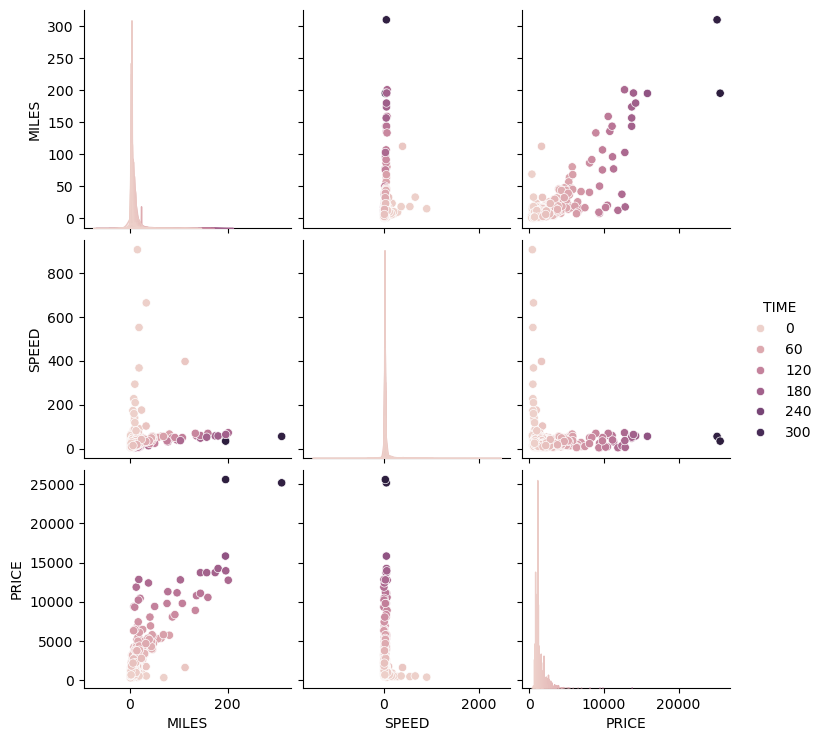

In [ ]:
import seaborn as sns
sns.pairplot(df[['MILES', 'TIME','SPEED', 'PRICE']], hue = 'TIME')

Данный график показывает зависимость скорости, пройденных миль, времени и цены от друг друга по времени.<br>
По графику можно сказать, что скорость никак не связана с другими данными, так как в целом скорость зависит только от ситуации на дороге (скоростной режим). <br>
Также видно что количество миль также зависит от стоимости, но уже более хаотично. А так как время линейно зависимо от количества миль, то и время от стоимости зависит также как и время от количества миль. 

Корреляция может быть измерена с помощью коэффициента корреляции, такого как коэффициент Пирсона. Коэффициент Пирсона находят с помощью метода `corr()`.

In [ ]:
df2 = df[['MILES', 'SPEED', 'TIME', 'PRICE']]
df2.corr()

,MILES,SPEED,TIME,PRICE
MILES,1.000000,0.192600,0.844875,0.845818
SPEED,0.192600,1.000000,0.005034,0.005651
TIME,0.844875,0.005034,1.000000,0.999998
PRICE,0.845818,0.005651,0.999998,1.000000


По корреляции уже точно можно сказать, что время линейно зависит от цены. Также видно что время и цена зависят от количества миль почти линейно. А вот скорость почти не зависит от других столбцов. 

Также можно вычислить коэффициент корреляции между двумя конкретными столбцами.

In [ ]:
df2['TIME'].corr(df2['PRICE'])

0.9999984314213056

Для расчета ковариации используется функция `cov()` библиотеки `numpy`.

In [ ]:
import numpy as np
data = np.array([df['TIME'], df['MILES'], df['PRICE'], df['SPEED']])
cov = np.cov(data, bias=True)
print(cov)

[[7.69130946e+02 5.16293703e+02 5.77798309e+04            nan]
 [5.16293703e+02 4.85521301e+02 3.88291572e+04            nan]
 [5.77798309e+04 3.88291572e+04 4.34063841e+06            nan]
 [           nan            nan            nan            nan]]


Ковариация положительна, что значит, что при увеличение одного значения - увеличивается и другое и наоборот. Поля с speed имеют nan так как видимо нет разнообразия данных. 

Также был была построена тепловая карта корреляции (`heatmap`). Матрица оформляется в цветовой палитре, так ярикие цвета - положительные коэффициенты, а темные - отрицательные. <br>
`imshow` позволяет создавать двумерные картинки, используя цветовую карту `summer`. Для наименования столбцов и строк использовальсь методы `xticks` и `yticks`.

([<matplotlib.axis.YTick at 0x7f865675dab0>,
 [Text(0, 0, 'MILES'),
  Text(0, 1, 'TIME'),
  Text(0, 2, 'SPEED'),
  Text(0, 3, 'PRICE')])

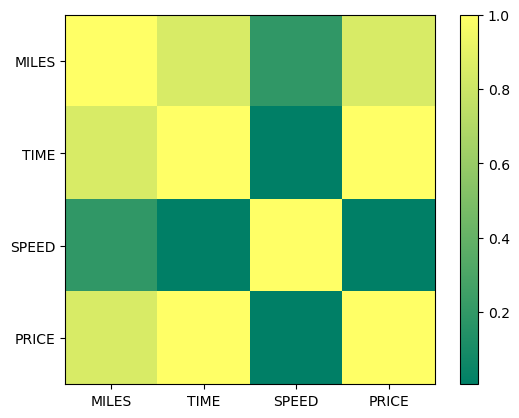

In [66]:
df2 = df[['MILES', 'TIME', 'SPEED', 'PRICE']]
corr = df2.corr()
plt.imshow(corr, cmap='summer')
plt.colorbar()
plt.xticks(range(len(corr.columns)),
           corr.columns)
plt.yticks(range(len(corr.columns)),
           corr.columns)

По данному графику можно сказать, что количество миль, время и цена зависят друг от друга почти линейно (светлее), а вот скорость не зависит от других значений (темнее).

## Индивидуальное задание

Задание 1: Использовать seaborn. По группировке - CATEGORY и количество поездок каждого типа (по цели маршрута - PURPOSE) отфильтровать данные группировки по количеству поездок больше 2 и построить диаграмму.

Для начала была проведена группировка данных функцией `groupby`, а с помощью `size` считает кол-во вхождений. <br>
Далее создается таблица с фильтрацией количества вхождений больше двух. <br>
Функция `barplot` строит столбчатую диаграмму, где по оси X отображаются различные цели маршрута (PURPOSE_ROUTE), по оси Y отображается количество поездок, а цвет столбцов указывает на категорию (CATEGORY).

Text(0, 0.5, 'Количество поездок')

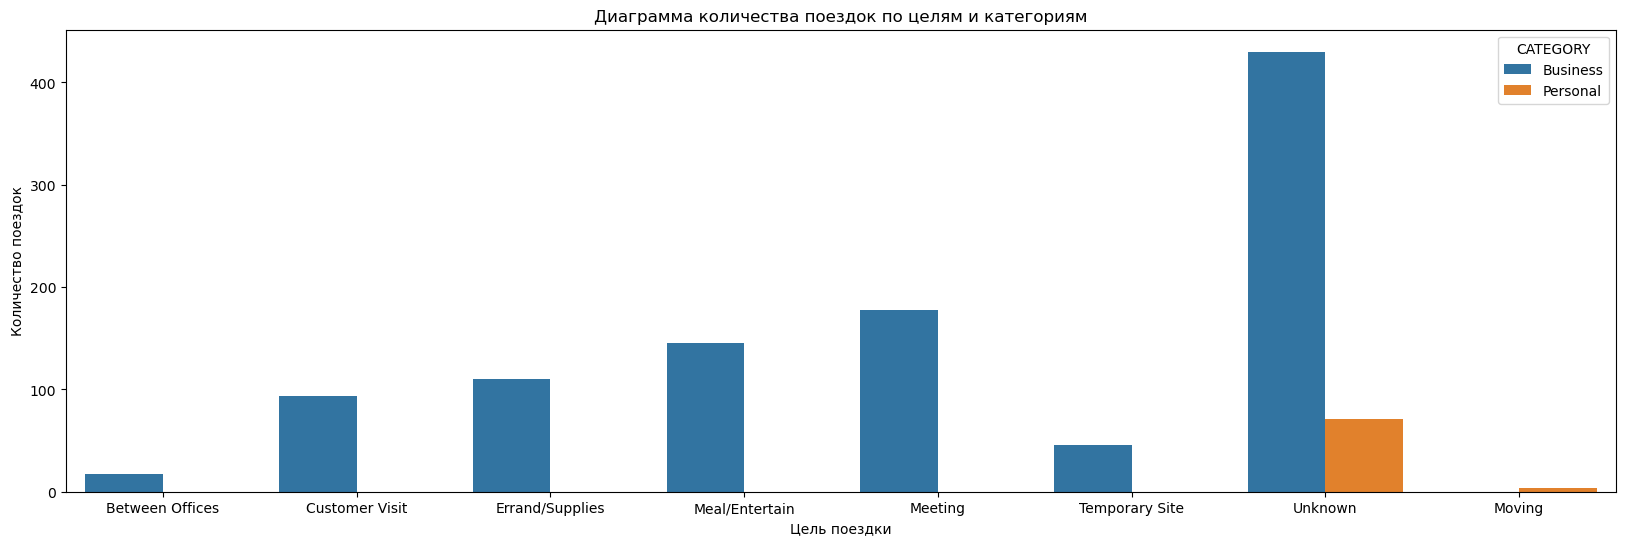

In [70]:
grouped_data = df.groupby(['CATEGORY', 'PURPOSE_ROUTE']).size().reset_index(name='count')
filtered_data = grouped_data[grouped_data['count'] > 2]

plt.subplots(figsize=(20, 6))

sns.barplot(x='PURPOSE_ROUTE', 
            y='count', 
            hue='CATEGORY', 
            data=filtered_data
)
plt.title('Диаграмма количества поездок по целям и категориям')
plt.xlabel(xlabel = 'Цель поездки')
plt.ylabel(ylabel = 'Количество поездок')

Этот график позволяет наглядно сравнить количество поездок для различных целей маршрута в разных категориях. Визуализация данных в виде столбчатой диаграммы делает анализ более понятным и удобным для интерпретации.

Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднее количество пройденных миль по каждой цели поездки (PURPOSE). Оставить только маркеры в виде ★ зеленого цвета размеров 18.

Сначала создаем сводную таблицу функцией `pivot_table`, с сркдним значением `MILES`, которые группируются по `PURPOSE_ROUTE`. <br>
Затем строим график по условию, звездочку рисуем символом - '*', а размер указываем 180. Сетку же добавляем при помощи `grid()`,

Text(0.5, 1.0, 'График среднего количество пройденных миль по каждой цели поездки')

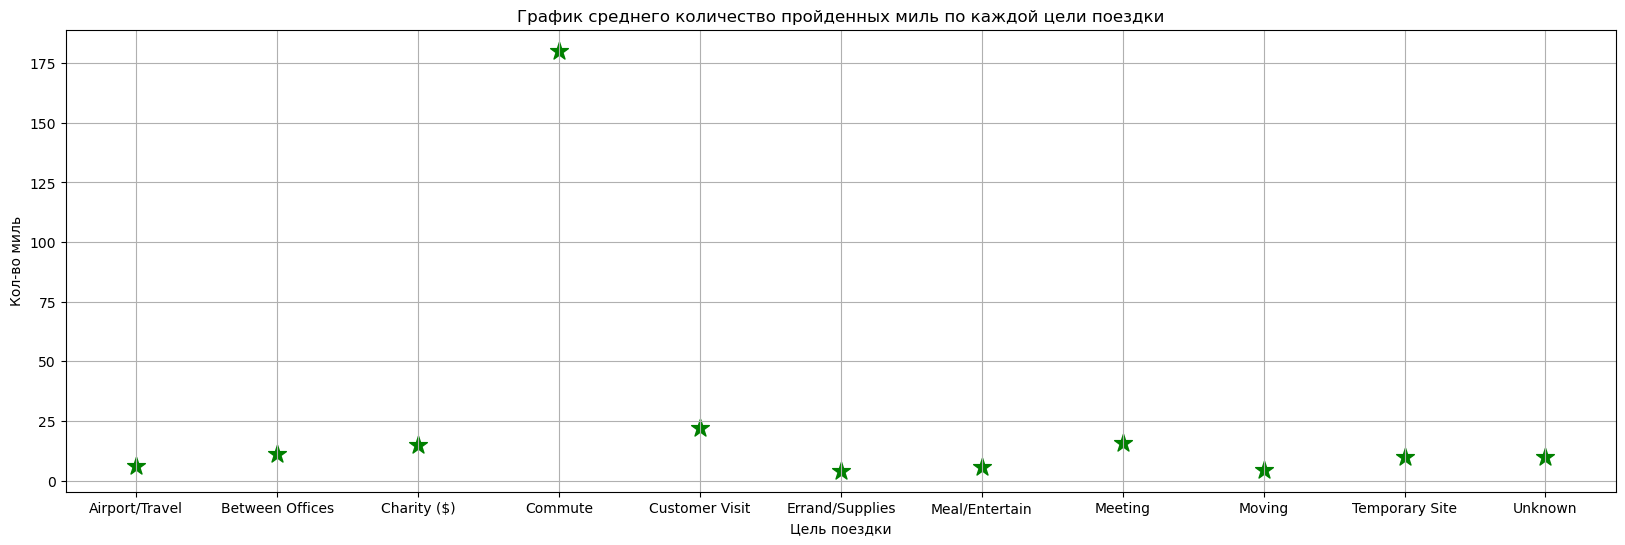

In [72]:
pivot_table = pandas.pivot_table(df, values='MILES', index='PURPOSE_ROUTE', aggfunc='mean')
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.scatter(
        pivot_table.index,
        pivot_table['MILES'],
        marker='*',
        color='green',
        s=180
)
plt.xlabel('Цель поездки')
plt.ylabel('Кол-во миль')
plt.title('График среднего количество пройденных миль по каждой цели поездки')


Этот график позволяет визуализировать и сравнить средние расстояния, пройденные для различных целей поездки. Зеленые звезды на графике представляют каждую уникальную цель поездки, и их вертикальное положение отражает среднее количество миль для каждой цели. Такой график позволяет быстро определить различия в пройденных расстояниях между разными целями поездки.

Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой цели поездки. Уберите из диаграммы количество поездок меньше 5.

Создаем сводную таблицу и фильтруем ее значения аналогичка предыдущим заданиям. <br>
Далее строим круговую диаграмму, у которой указываем формат отображения процентов.

Text(0.5, 1.0, 'Распределение целей поездки')

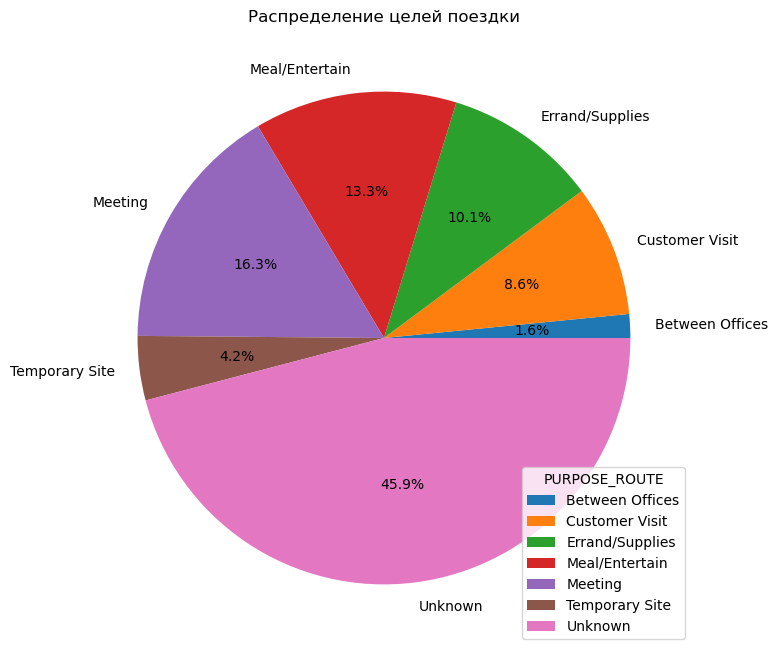

In [73]:
pivot_table = pandas.pivot_table(df, values='MILES', index='PURPOSE_ROUTE', aggfunc='count')
filtered_pivot_table = pivot_table[pivot_table['MILES'] >= 5]
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_pivot_table['MILES'], 
    labels=filtered_pivot_table.index, 
    autopct='%1.1f%%'
)
plt.legend(title='PURPOSE_ROUTE', loc='lower right')
plt.title('Распределение целей поездки')

Этот график позволяет визуализировать процентное распределение целей поездки для категорий, где количество поездок составляет 5 и более. Круговая диаграмма наглядно показывает, какие цели поездки являются более распространенными среди данных с учетом заданного условия (поездки >= 5).

## Вывод

В ходе исследования данных я научился использовать различные библиотеки Python для визуализации и анализа данных. Я освоил создание графиков, включая столбчатые, круговые и точечные диаграммы, а также работу с различными аспектами графического представления данных, включая добавление аннотаций, легенд и цветовых схем. Также я освоил работу с таблицами и сводными таблицами, фильтрацию данных и применение различных агрегирующих функций.<br>
Это позволяет мне создавать информативные визуализации данных и проводить анализ данных, выявляя закономерности и взаимосвязи в больших объемах информации. Полученные навыки помогут мне более эффективно и наглядно представлять данные в будущем, делая их доступными и понятными для аудитории.